In [1]:
# 1. Import Libraries
# 2. Read Data File
# 3. Checking Null value
# 4. Check Coorelation 
# 5. Checking Zero Variance
# 6. Checking Outliers
# 7. Hypothesis Design
# 8. Data Pre-Processing "catagorical values replace with no(one hot-encoding)"
# 9. Create Data frame as train and test data sets
# 10. Split data into train and test data sets
# 11. Scalling and Standardization
# 12. Logistic Regression Model Train
# 14. Prediction and Evaluation
# 15. Performance Matrics
# 16. Recall Check
# 17. Area Under the Curve
# 18. confution Matrics
# 19. Prediction
# 20. Predict full data sets on DT model
# 21. Export the DataFrame into a CSV file with Prediction values

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns


# for see no of column can visible
pd.set_option('display.max_columns',300)

## Read File

In [3]:
data = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [4]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [5]:
data.shape

(2940, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
names = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

target = ['Yes','No']

In [8]:
data.set_index(['EmployeeNumber'],inplace=True)

In [9]:
data.tail(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2938,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2939,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
2940,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


## Checking Null Values

In [10]:
data.notnull().count()

Age                         2940
Attrition                   2940
BusinessTravel              2940
DailyRate                   2940
Department                  2940
DistanceFromHome            2940
Education                   2940
EducationField              2940
EmployeeCount               2940
EnvironmentSatisfaction     2940
Gender                      2940
HourlyRate                  2940
JobInvolvement              2940
JobLevel                    2940
JobRole                     2940
JobSatisfaction             2940
MaritalStatus               2940
MonthlyIncome               2940
MonthlyRate                 2940
NumCompaniesWorked          2940
Over18                      2940
OverTime                    2940
PercentSalaryHike           2940
PerformanceRating           2940
RelationshipSatisfaction    2940
StandardHours               2940
StockOptionLevel            2940
TotalWorkingYears           2940
TrainingTimesLastYear       2940
WorkLifeBalance             2940
YearsAtCom

In [11]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [12]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940,2940,2940.000000,2940,2940.000000,2940.000000,2940,2940.0,2940.000000,2940,2940.000000,2940.000000,2940.000000,2940,2940.000000,2940,2940.000000,2940.000000,2940.000000,2940,2940,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2466,2086,NaN,1922,NaN,NaN,1212,NaN,NaN,1764,NaN,NaN,NaN,652,NaN,1346,NaN,NaN,NaN,2940,2108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,NaN,NaN,403.440447,NaN,8.105485,1.023991,NaN,0.0,1.092896,NaN,20.325969,0.711440,1.106752,NaN,1.102658,NaN,4707.155770,7116.575021,2.497584,NaN,NaN,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8045.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8380.000000,20462.000000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## Checking Coorelation

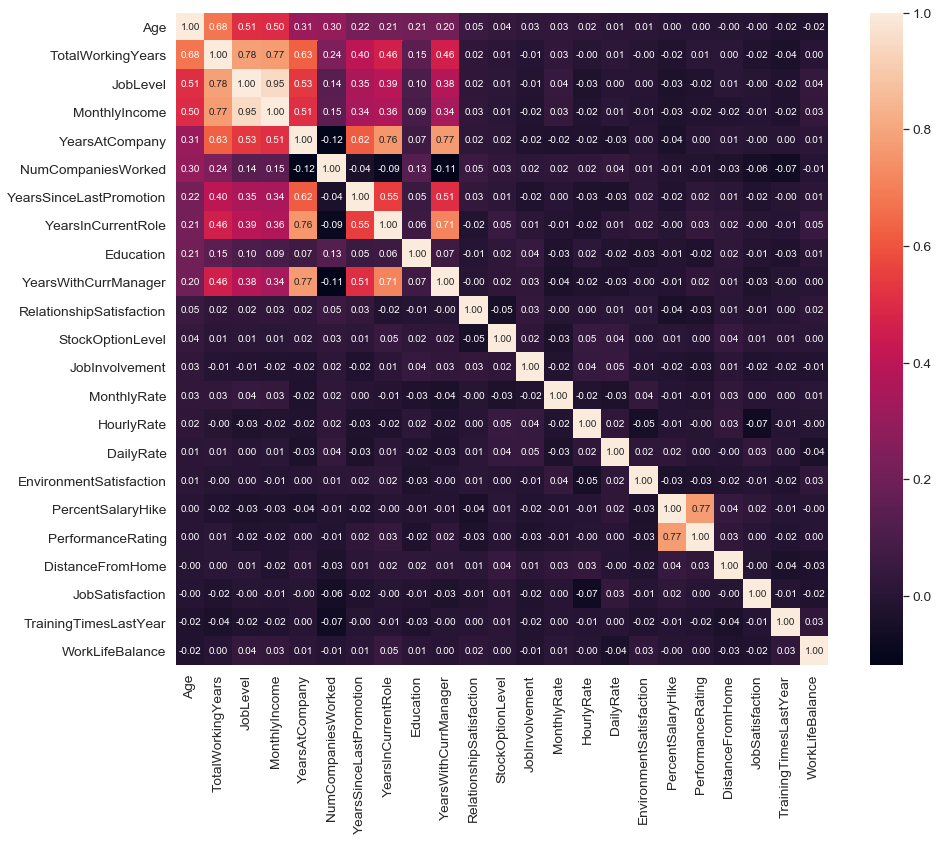

In [14]:
plt.figure(figsize=(15,12))
corrmat = data.corr()
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Age')['Age'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
# usually KNN model is not impaced on coorelation

# 1. TotalWorkingYears is highly coorelate with JobLevel and MonthlyIncome, so we can drop those two highly coorelate
#    coulumns
# 2.YearsAtCompany is highly coorelate with YearsInCurrentRole and YearsWithCurrManager so we can drop those two highly
#   coorelated columns
# 3.PercentSalaryHike is highly coorelate with PerformanceRating so we can drop this column

In [16]:
data.drop(['JobLevel','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager','PerformanceRating'],axis=1,
          inplace=True)

In [17]:
data.shape

(2940, 29)

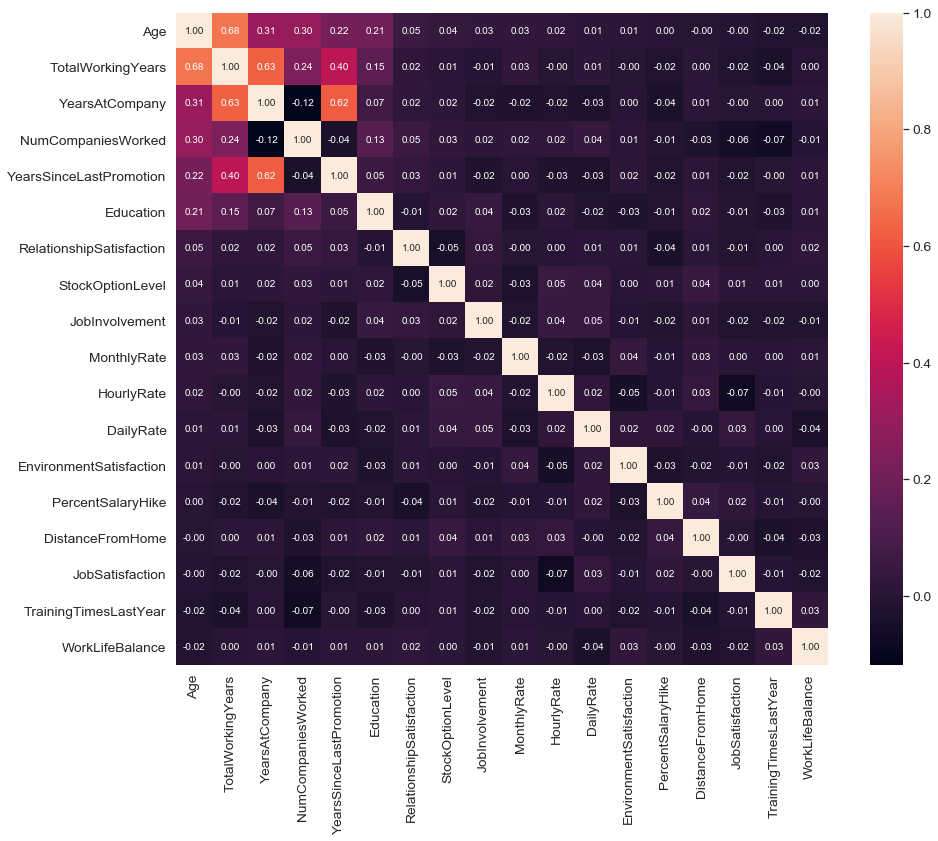

In [18]:
plt.figure(figsize=(15,12))
corrmat = data.corr()
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Age')['Age'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
corrmat1 = data.corr()
corrmat1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,0.010661,-0.001686,0.208034,NaN,0.010146,0.024287,0.029820,-0.004892,0.028051,0.299635,0.003634,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.216513
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,0.018355,0.023381,0.046135,0.030571,-0.032182,0.038153,0.022704,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,-0.033229
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,-0.016075,0.031131,0.008783,-0.003669,0.027473,-0.029251,0.040235,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.010029
Education,0.208034,-0.016806,0.021042,1.000000,NaN,-0.027128,0.016775,0.042438,-0.011296,-0.026084,0.126317,-0.011111,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.054254
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,1.000000,-0.049857,-0.008278,-0.006784,0.037600,0.012594,-0.031701,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.016194
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,-0.049857,1.000000,0.042861,-0.071335,-0.015297,0.022157,-0.009062,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.026716
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.008278,0.042861,1.000000,-0.021476,-0.016322,0.015012,-0.017205,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,-0.024184
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,NaN,-0.006784,-0.071335,-0.021476,1.000000,0.000644,-0.055699,0.020002,-0.012454,NaN,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.018214
MonthlyRate,0.028051,-0.032182,0.027473,-0.026084,NaN,0.037600,-0.015297,-0.016322,0.000644,1.000000,0.017521,-0.006429,-0.004085,NaN,-0.034323,0.026442,0.001467,0.007963,-0.023655,0.001567


In [20]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,19479,8,Y,Yes,11,1,80,0,8,0,1,6,0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,Research Scientist,2,Married,24907,1,Y,No,23,4,80,1,10,3,3,10,1
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,Laboratory Technician,3,Single,2396,6,Y,Yes,15,2,80,0,7,3,3,0,0


## Checking Zero Variance columns

In [21]:
data.EmployeeCount.describe()

count    2940.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [22]:
data.Over18.describe()

count     2940
unique       1
top          Y
freq      2940
Name: Over18, dtype: object

In [23]:
data.StandardHours.describe()

count    2940.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

In [24]:
data.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [25]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,1,0,8,0,1,6,0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,24907,1,No,23,4,1,10,3,3,10,1


## Checking Ouliers

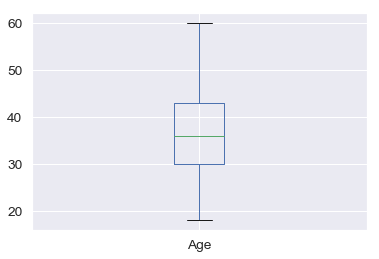

In [26]:
data.Age.plot(kind='box')

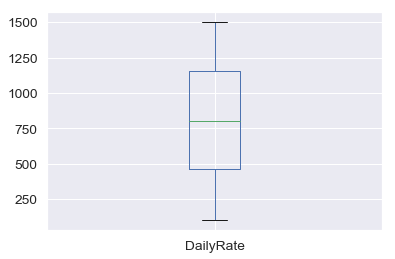

In [27]:
data.DailyRate.plot(kind='box')

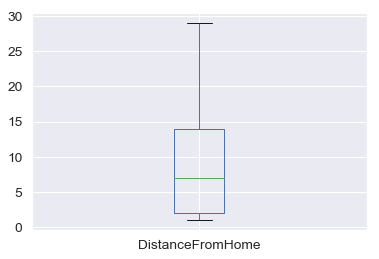

In [28]:
data.DistanceFromHome.plot(kind='box')

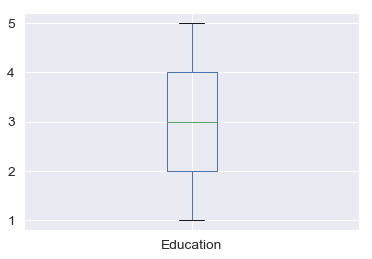

In [29]:
data.Education.plot(kind='box')

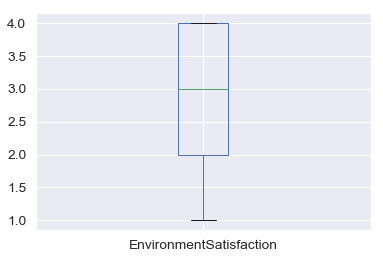

In [30]:
data.EnvironmentSatisfaction.plot(kind='box')

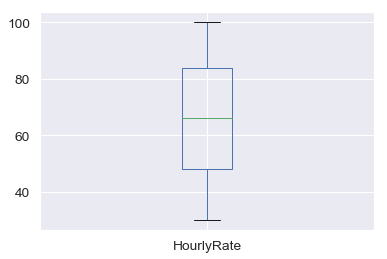

In [31]:
data.HourlyRate.plot(kind='box')

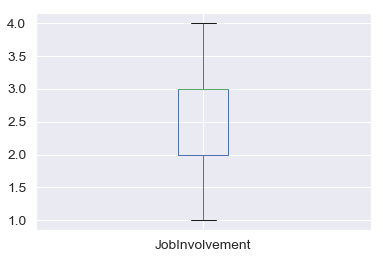

In [32]:
data.JobInvolvement.plot(kind='box')

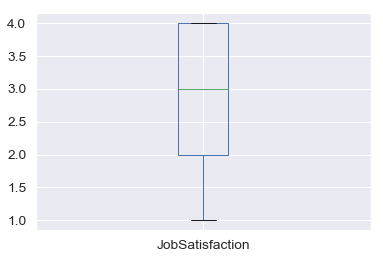

In [33]:
data.JobSatisfaction.plot(kind='box')

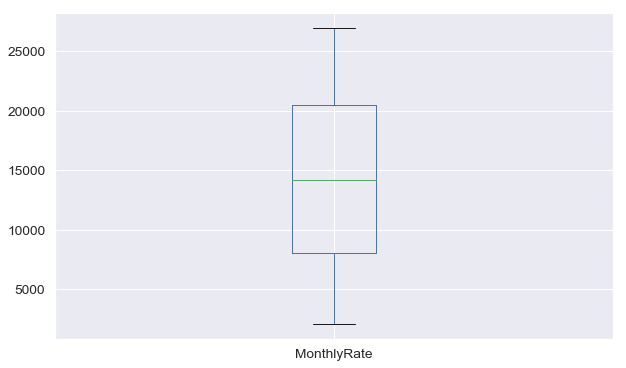

In [34]:
plt.figure(figsize=(10,6))
data.MonthlyRate.plot(kind='box')

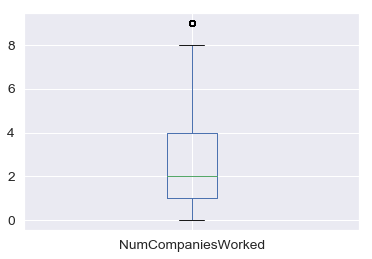

In [35]:
data.NumCompaniesWorked.plot(kind='box')

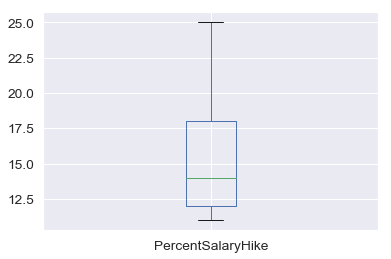

In [36]:
data.PercentSalaryHike.plot(kind='box')

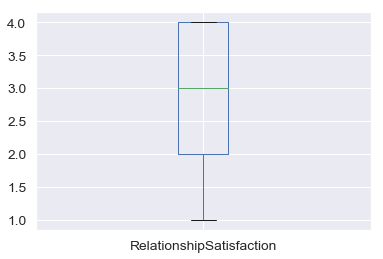

In [37]:
data.RelationshipSatisfaction.plot(kind='box')

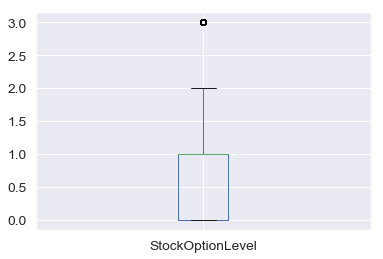

In [38]:
data.StockOptionLevel.plot(kind='box')

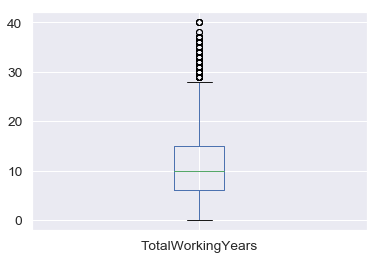

In [39]:
data.TotalWorkingYears.plot(kind='box')

In [40]:
data.TotalWorkingYears.describe()

count    2940.000000
mean       11.279592
std         7.779458
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

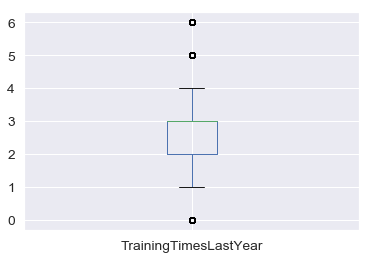

In [41]:
data.TrainingTimesLastYear.plot(kind='box')

In [42]:
data.TrainingTimesLastYear.describe()

count    2940.000000
mean        2.799320
std         1.289051
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

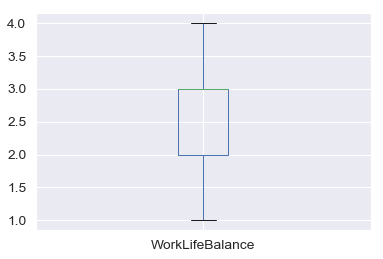

In [43]:
data.WorkLifeBalance.plot(kind='box')

In [44]:
# yearsAtCompany having outliers but for comapny those people are most important whose spend more time
# with this company and same YearsSinceLastPromotion also is important for company 

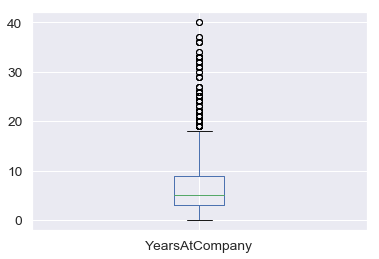

In [45]:
data.YearsAtCompany.plot(kind='box')

In [46]:
data.YearsAtCompany.describe()

count    2940.000000
mean        7.008163
std         6.125483
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

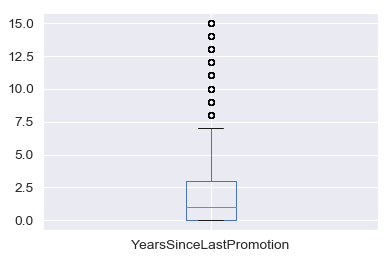

In [47]:
data.YearsSinceLastPromotion.plot(kind='box')

In [48]:
data.YearsSinceLastPromotion.describe()

count    2940.000000
mean        2.187755
std         3.221882
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

## Hypothesis Design

#### Design based on Attrition and Dailyrate

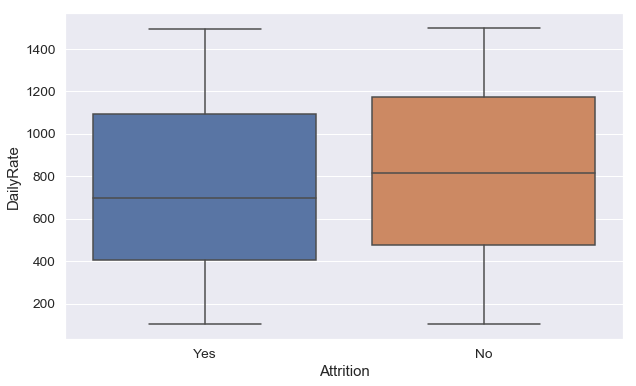

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['DailyRate'],x=data['Attrition'])

In [50]:
# Null Hypothesis:- there is no change on attrition based on dailyrate
# Alternative Hypothesis:- there is a change on attrition based on dailyrate

In [51]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

data = data[np.abs(stats.zscore(data['DailyRate']))<3]
attrition_yes = data[data['Attrition']=='Yes']['DailyRate']
attrition_no = data[data['Attrition']=='No']['DailyRate']

attirition_no = attrition_no.values.tolist()
attirition_no = random.sample(attirition_no,100)
attirition_yes = attrition_yes.values.tolist()
attirition_yes = random.sample(attirition_yes,100)

In [52]:
ttest,pval = ttest_ind(attirition_yes,attrition_no,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -3.540873822418831
p value 0.0005922417771457384
we reject null hypothesis


#### Design based on Attrition and DistanceFromHome

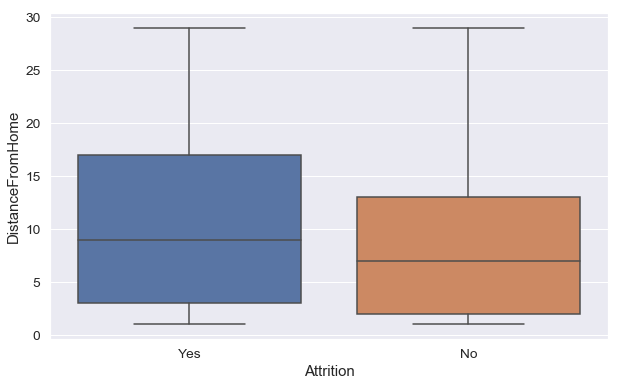

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['DistanceFromHome'],x=data['Attrition'])

In [54]:
# Null Hypothesis:- there is no change on attrition based on DistanceFromHome
# Alternative Hypothesis:- there is a change on attrition based on DistanceFromHome

In [55]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

data = data[np.abs(stats.zscore(data['DistanceFromHome']))<3]
attrition_yes = data[data['Attrition']=='Yes']['DistanceFromHome']
attrition_no = data[data['Attrition']=='No']['DistanceFromHome']

attirition_no = attrition_no.values.tolist()
attirition_no = random.sample(attirition_no,100)
attirition_yes = attrition_yes.values.tolist()
attirition_yes = random.sample(attirition_yes,100)

In [56]:
ttest,pval = ttest_ind(attirition_yes,attrition_no,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.1655927281776113
p value 0.002018734552547751
we reject null hypothesis


#### Design based on Attrition and JobSatisfaction

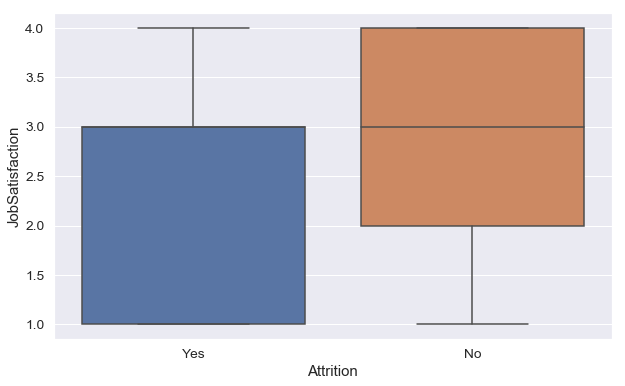

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['JobSatisfaction'],x=data['Attrition'])

In [58]:
# Null Hypothesis:- there is no change on attrition based on JobSatisfaction
# Alternative Hypothesis:- there is a change on attrition based on JobSatisfaction

In [59]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

data = data[np.abs(stats.zscore(data['JobSatisfaction']))<3]
attrition_yes = data[data['Attrition']=='Yes']['JobSatisfaction']
attrition_no = data[data['Attrition']=='No']['JobSatisfaction']

attirition_no = attrition_no.values.tolist()
attirition_no = random.sample(attirition_no,100)
attirition_yes = attrition_yes.values.tolist()
attirition_yes = random.sample(attirition_yes,100)

In [60]:
ttest,pval = ttest_ind(attirition_yes,attrition_no,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -2.965507944524447
p value 0.003724751458126972
we reject null hypothesis


#### Design based on Attrition and MonthlyRate

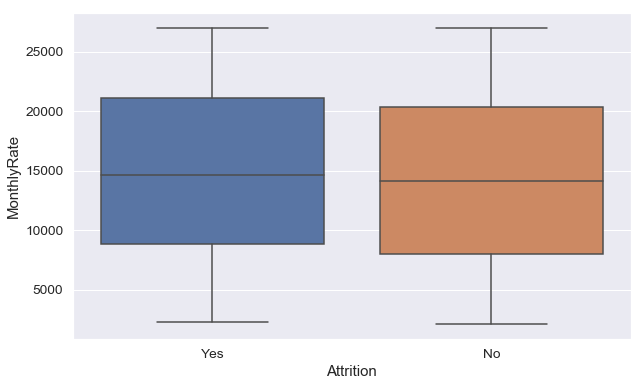

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['MonthlyRate'],x=data['Attrition'])

In [62]:
# Null Hypothesis:- there is no change on attrition based on MonthlyRate
# Alternative Hypothesis:- there is a change on attrition based on MonthlyRate

In [63]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

data = data[np.abs(stats.zscore(data['MonthlyRate']))<3]
attrition_yes = data[data['Attrition']=='Yes']['MonthlyRate']
attrition_no = data[data['Attrition']=='No']['MonthlyRate']

attirition_no = attrition_no.values.tolist()
attirition_no = random.sample(attirition_no,100)
attirition_yes = attrition_yes.values.tolist()
attirition_yes = random.sample(attirition_yes,100)

In [64]:
ttest,pval = ttest_ind(attirition_yes,attrition_no,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -0.19724276195968993
p value 0.8440144870429876
we accept null hypothesis


#### Design based on Attrition and PercentSalaryHike

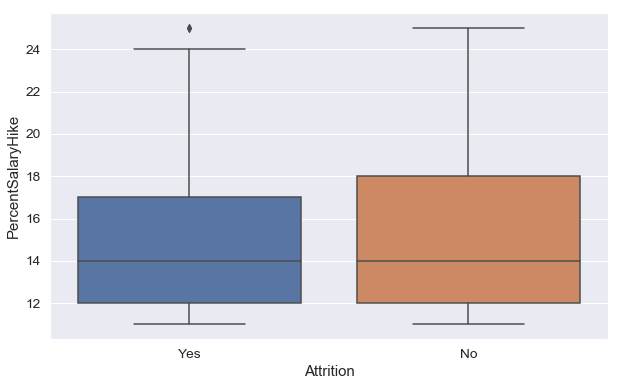

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['PercentSalaryHike'],x=data['Attrition'])

In [66]:
# Null Hypothesis:- there is no change on attrition based on PercentSalaryHike
# Alternative Hypothesis:- there is a change on attrition based on PercentSalaryHike

In [67]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

data = data[np.abs(stats.zscore(data['PercentSalaryHike']))<3]
attrition_yes = data[data['Attrition']=='Yes']['PercentSalaryHike']
attrition_no = data[data['Attrition']=='No']['PercentSalaryHike']

attirition_no = attrition_no.values.tolist()
attirition_no = random.sample(attirition_no,100)
attirition_yes = attrition_yes.values.tolist()
attirition_yes = random.sample(attirition_yes,100)

In [68]:
ttest,pval = ttest_ind(attirition_yes,attrition_no,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 1.4759121361193577
p value 0.14293117922813478
we accept null hypothesis


## Data Pre-Processing "catagorical values replace with no(one hot-encoding)"

In [69]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,1,0,8,0,1,6,0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,24907,1,No,23,4,1,10,3,3,10,1
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2396,6,Yes,15,2,0,7,3,3,0,0


In [70]:
def preprocessor(df):
    res_df = data.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

In [71]:
encoded_data = preprocessor(data)
encoded_data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,2,1102,2,1,2,1,2,0,94,3,7,4,2,19479,8,1,11,1,0,8,0,1,6,0
2,49,0,1,279,1,8,1,1,3,1,61,2,6,2,1,24907,1,0,23,4,1,10,3,3,10,1


In [72]:
encoded_data.shape

(2940, 26)

## Create Data frame as train and test data sets

In [73]:
x = encoded_data.iloc[:, encoded_data.columns != 'Attrition']
y = encoded_data.iloc[:, encoded_data.columns == 'Attrition']

## Split data into train and test data sets

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [75]:
y_train = y_train.values.ravel() 
y_test = y_test.values.ravel()

## Scalling and Standardization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_test)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  


## Logistic Regression Model Train

In [77]:
logreg = LogisticRegression()
# fit data into the model
logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Prediction and Evaluation

In [78]:
y_pred = logreg.predict(x_test)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[480  14]
 [ 62  32]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       494
           1       0.70      0.34      0.46        94

   micro avg       0.87      0.87      0.87       588
   macro avg       0.79      0.66      0.69       588
weighted avg       0.86      0.87      0.85       588



## Performance Matrics

In [81]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [82]:
predictions = logreg.predict(x_test)
print(predictions)

print(logreg.score(x_test,y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [83]:
y_actual_result = y_test[0]
print(y_actual_result)

1


In [84]:
for i in range(len(predictions)):
    if (predictions[i]==1):
        y_actual_result = np.vstack((y_actual_result,y_test[i]))
#         print(y_actual_result)

## Recall check

In [85]:
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if (result == 1):
        count +=1
print("true yes|predict true yes:")
print(count/float(len(y_actual_result)))

true yes|predict true yes:
0.7021276595744681


## Check Area under the curve

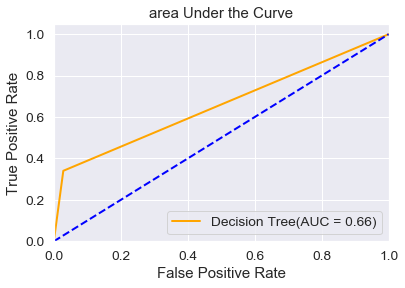

In [86]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [ ]:
# Our Model Performance poor but Accuracy is good

## Confution Matrix

In [87]:
print(confusion_matrix(y_test,predictions))

[[480  14]
 [ 62  32]]


In [88]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model,normalize=False):
    cm = confusion_matrix(y_test,model,labels=[0,1])
    classes = ["Success","Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matix"
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

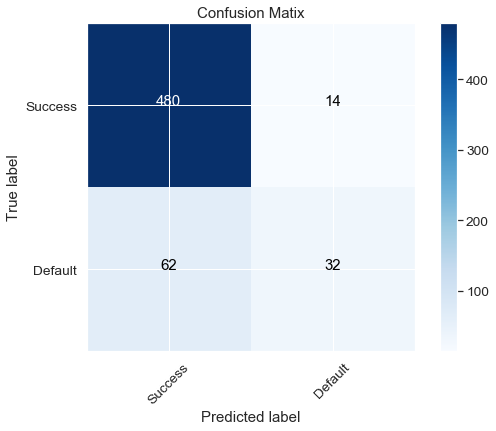

In [89]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

## Checking Accuracy

In [90]:
accuracy_score(y_test,predictions)

0.8707482993197279

## Predict full data sets on DT model

In [91]:
data_preditor_without_target = encoded_data.drop('Attrition',axis=1).values
data_preditor_only_target = encoded_data['Attrition'].values

In [92]:
print(data_preditor_only_target)

[1 0 1 ... 0 0 0]


In [94]:
predictions_c = logreg.predict(data_preditor_without_target)

In [95]:
print(predictions_c)

[1 1 1 ... 1 1 1]


## Export the DataFrame into a CSV file with Prediction values

In [96]:
data['Predicted_Status'] = np.where(data_preditor_only_target,predictions_c,data_preditor_only_target)

In [97]:
data['Predicted_Status'].replace(to_replace=1,value='Yes',inplace=True)

In [98]:
data['Predicted_Status'].replace(to_replace=0,value='No',inplace=True)

In [99]:
data.to_csv('HR_Employee_Attrition_Predictive_Data.csv')